In [ ]:
"""
    Model Evaluation procedure
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# Read the data
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
# train and test on the same data (bad)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.score(X, y)

1.0

In [7]:
## Test set approach

# understanding train_test_split
from sklearn.model_selection import train_test_split

In [8]:
features = np.array([range(10), range(10, 20)]).T
features

array([[ 0, 10],
       [ 1, 11],
       [ 2, 12],
       [ 3, 13],
       [ 4, 14],
       [ 5, 15],
       [ 6, 16],
       [ 7, 17],
       [ 8, 18],
       [ 9, 19]])

In [10]:
response = ['even', 'odd'] * 5
response

['even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd']

In [12]:
# Step 1: split data into training set and test set
features_train, features_test, response_train, response_test \
= train_test_split(features, response, random_state=4)
# the random_state allows us all to get the same random numbers

In [13]:
features_train # 70 % of the training set

array([[ 9, 19],
       [ 2, 12],
       [ 6, 16],
       [ 0, 10],
       [ 1, 11],
       [ 5, 15],
       [ 7, 17]])

In [14]:
features_test # remaining 30% of the training set

array([[ 3, 13],
       [ 8, 18],
       [ 4, 14]])

In [15]:
response_train # 70 % of the responses, the same ones as features train

['odd', 'even', 'even', 'even', 'odd', 'odd', 'odd']

In [16]:
response_test # remaining 30 %

['odd', 'even', 'even']

In [20]:
# Steps 2 and 3: calculate test set error for K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_train, response_train) # Fit to the training
knn.score(features_test, response_test) # and scored on the test set

0.0

In [21]:
# Overfitting

# Step 4 (parameter tuning): Calculate test set error for K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train, response_train)
knn.score(features_test, response_test)

0.6666666666666666

In [22]:
# steps 5 and 6: choose best model (K=3) and train on all data

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# There are two types of data we will deal with in ML
# In sample and out of sample data
# the in-simple data consists of our training and test sets,
# Note we know the answer to all of them!
# the out of sample data are data that we really haven't seen before
# They are the reason we built it in the first time!

# Step 7: make predictions on new out of sample data

out_of_sample = [[5, 4, 3, 2], [4, 3, 2, 1]]
knn.predict(out_of_sample)

array([1, 0])

In [24]:
# Verify that a different train/test split can result in a different test set error
features_train, features_test, response_train, response_test \
= train_test_split(X, y, random_state=1)

In [25]:
features_train.shape

(112, 4)

In [26]:
response_train.shape

(112,)

In [27]:
features_test.shape

(38, 4)

In [28]:
response_test.shape

(38,)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train, response_train)
knn.score(features_test, response_test)

1.0

In [31]:
# Using a training set and test set is so important
# Just as important is cross validation. Cross validation is
# Just using several different train test splits and 
# averaging your results!

## Cross-Validations

# check cv score for K=1
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
# cv = 5, means take 5 different train and test split data

In [32]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [33]:
np.mean(scores)

0.96

In [34]:
# check CV score for K=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores
np.mean(scores)

0.9733333333333334

In [35]:
# Search for an optimal value for K
k_range = range(1, 30, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy')))
scores

[0.96,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.96,
 0.96,
 0.9466666666666667,
 0.9333333333333332]

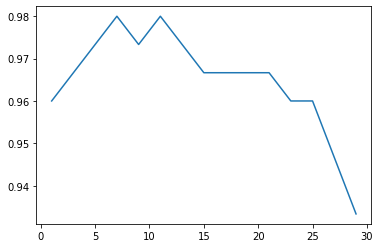

In [36]:
# plot the K values (X-axis) versus the 5-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)

In [38]:
# automatic grid search for an optimal value for k
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2)}, scoring='accuracy')

In [75]:
grid.scorer_
grid_mean_scores = [result[1] for result in grid.scorer_]

TypeError: '_PredictScorer' object is not iterable

ValueError: x and y must have same first dimension, but have shapes (15,) and (8,)

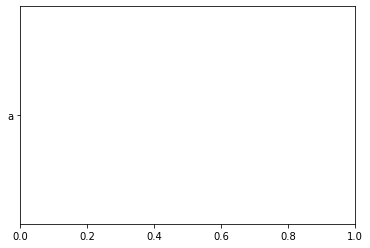

In [69]:
plt.figure()
plt.plot(k_range, grid_mean_scores)

In [64]:
grid.best_score_

0.9800000000000001

In [65]:
grid.best_params_

{'n_neighbors': 7}

In [66]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)